# This is to check the sim2h5 statistics. 

In [1]:
%matplotlib inline
import os
import math
import h5py

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
fdata_dict ={
    's20_cosima'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/20MeVBeam-100000Trig.inc1.id1.sim',
    's20_sim_h5'    : '/Users/swasti/code/test_temp/multi_hit/sim_20meV_nosmear/20MeVBeam-100000Trig.inc1.id1.sim.h5',
}

# Cosima File

In [6]:
with open(fdata_dict['s20_cosima']) as f:
    contents = f.readlines()

In [7]:
trk_hit_main =[]
for i in range(len(contents)):
# for i in range(400):
    line = contents[i]

    if not line.isspace():
        if (line.find('SE') >= 0):
            
            line = contents[i+1]
            curid = line.split()[1] #next line to SE is is the ID.
            
#             print(curid)

            pair_flag = False
            trk_flag = False
            
            trk_hit = []
            
            i+=1
            line = contents[i]
            while (line.find('SE') < 0):          
                
                if (line.find('IA') >= 0) and  (line.find('PAIR') >= 0):  # no. of hits
                    pair_flag = True

                if (line.find('HTsim') >= 0):  # no. of hits
                    delme = line.split()
                    if delme[1] == '1;':
                        delme1 = line.split(";")
                        trk_hit = [float(curid),float(delme1[1]),float(delme1[2]),float(delme1[3]),float(delme1[4])]
                        trk_flag = True
                        
                        if pair_flag:
                            trk_hit_main.append(trk_hit)
                
                
                    
                i+=1
                if i<len(contents):
                    line = contents[i]
                else:
                    break
            

In [8]:
trk_hit_main = np.array(trk_hit_main)
trk_evtid = trk_hit_main[:,0] # Tracks only pair

In [9]:
print(len(np.unique(trk_evtid)))
pair_evtid= np.unique(trk_evtid)

44784


# sim2h5

Basically get statistics for true pairs.

In [14]:
fname = fdata_dict['s20_sim_h5']
h5_sim = h5py.File(fname,'r')

In [15]:
h5_nrg = h5_sim['Events/TKR/Energy']

In [16]:
h5_nrg.shape

(100000, 10, 2, 192)

In [20]:
nevt = h5_nrg.shape[0]
cnt_array=np.zeros((10,6,6), dtype=int)

for i in range(nevt):
    t_nrg = h5_nrg[i]
    
    for j in range(10):
        temp_nrg = t_nrg[j]
        
        a_cnt = np.count_nonzero(temp_nrg[0,:]>0.0)  # side a count
        b_cnt = np.count_nonzero(temp_nrg[1,:]>0.0)  # side b count
        
        if a_cnt>4 or b_cnt>4:
            cnt_array[j,5,5]+= 1
        else:
            cnt_array[j,a_cnt,b_cnt]+= 1

In [21]:
cnt_array

array([[[97972,     0,     0,     0,     0,     0],
        [    0,  1060,   133,     6,     2,     0],
        [    0,   119,   283,    91,    10,     0],
        [    0,     9,    93,    87,    10,     0],
        [    0,     0,    14,    25,    21,     0],
        [    0,     0,     0,     0,     0,    65]],

       [[90116,     0,     0,     0,     0,     0],
        [    0,  3882,   795,    33,     4,     0],
        [    0,   768,  1275,   530,    98,     0],
        [    0,    47,   567,   522,   184,     0],
        [    0,     9,   106,   207,   141,     0],
        [    0,     0,     0,     0,     0,   716]],

       [[83126,     0,     0,     0,     0,     0],
        [    0,  6490,  1703,    78,    12,     0],
        [    0,  1784,  2086,   733,   150,     0],
        [    0,    65,   784,   729,   301,     0],
        [    0,    11,   157,   292,   252,     0],
        [    0,     0,     0,     0,     0,  1247]],

       [[78790,     0,     0,     0,     0,     0],
      

In [24]:
tot_hit_array = np.sum(cnt_array, axis=0)
tot_hit_array

array([[817380,      0,      0,      0,      0,      0],
       [     0,  68189,  21017,   1069,    152,      0],
       [     0,  20779,  22562,   7686,   1610,      0],
       [     0,   1107,   7805,   7374,   3093,      0],
       [     0,    167,   1695,   3088,   2458,      0],
       [     0,      0,      0,      0,      0,  12769]])

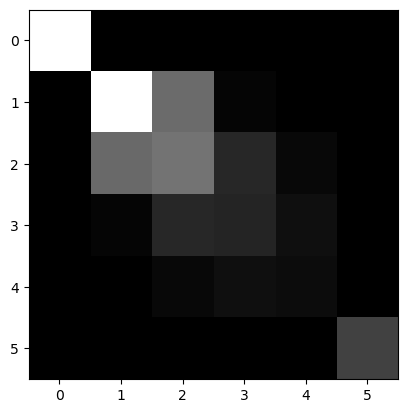

In [29]:
plt.imshow(tot_hit_array, cmap='gray', interpolation='nearest',vmax=50000)
plt.show()